In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
data = pd.read_csv('output.txt', header = None)
print(data)

             0         1         2         3             4         5  \
0     1.333243  1.347129  1.330000  1.338700   2498.285714  1.338700   
1     1.320214  1.336886  1.315429  1.332600   3319.428571  1.332600   
2     1.327143  1.337000  1.318886  1.320743   5425.428571  1.320743   
3     1.271429  1.276257  1.267400  1.273486   3082.857143  1.273486   
4     1.273414  1.275700  1.264500  1.270200   1868.571429  1.270200   
5     1.260371  1.274643  1.256114  1.269771   2899.428571  1.269771   
6     1.240629  1.257086  1.237300  1.255614   2411.857143  1.255614   
7     1.229457  1.232057  1.225329  1.227071   1668.857143  1.227071   
8     1.228200  1.234186  1.225000  1.228686   1695.571429  1.228686   
9     1.224843  1.228857  1.219329  1.223586   1539.285714  1.223586   
10    1.217914  1.224843  1.216071  1.219986   1336.000000  1.219986   
11    1.201971  1.222343  1.201471  1.221614   1492.571429  1.221614   
12    1.201486  1.205329  1.196929  1.200257   1524.571429  1.20

In [22]:
x, y = data.iloc[:, [0]], data.iloc[:, [3]]

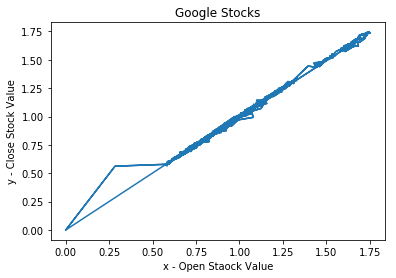

In [13]:
plt.plot(x,y)
plt.xlabel('x - Open Staock Value')
plt.ylabel('y - Close Stock Value') 
plt.title('Google Stocks') 
plt.show() 

In [14]:
dataset_train = pd.read_csv("VisualizationGOOGL.csv")
print(dataset_train)

            Open        High         Low       Close   Volume  Adj. Close
0     810.869995  813.960022  798.260010  805.479980  2355900  805.479980
1     822.429993  822.630005  808.000000  809.900024  2242700  809.900024
2     829.940002  839.000000  817.000000  819.559998  4354900  819.559998
3     823.010010  826.580017  814.609985  817.349976  2973500  817.349976
4     827.119995  827.710022  816.349976  822.099976  1794900  822.099976
5     838.500000  838.500000  825.299988  828.549988  1890700  828.549988
6     830.090027  837.940002  829.039978  835.739990  1447600  835.739990
7     820.000000  824.289978  818.309998  824.059998  1615800  824.059998
8     827.559998  828.469971  820.549988  821.630005  1393900  821.630005
9     822.880005  829.799988  822.880005  826.840027  1500100  826.840027
10    814.210022  828.809998  813.330017  821.489990  2289300  821.489990
11    805.989990  813.489990  803.830017  806.840027  1056400  806.840027
12    807.450012  810.090027  802.3200

In [7]:
trainset = dataset_train.iloc[:,1:2].values
trainset

array([[822.630005],
       [839.      ],
       [826.580017],
       ...,
       [411.860011],
       [404.999995],
       [199.524521]])

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
training_scaled

array([[0.60533556],
       [0.62123871],
       [0.60917293],
       ...,
       [0.20628004],
       [0.19961566],
       [0.        ]])

In [11]:
x_train = []
y_train = []

for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

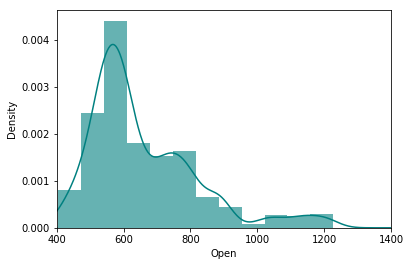

In [19]:
ax = dataset_train["Open"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
dataset_train["Open"].plot(kind='density', color='teal')
ax.set(xlabel='Open')
plt.xlim(400,1400)
plt.show()

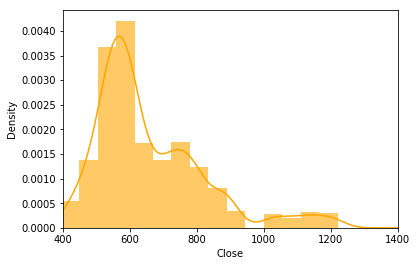

In [23]:
ax = dataset_train["Close"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
dataset_train["Close"].plot(kind='density', color='orange')
ax.set(xlabel='Close')
plt.xlim(400,1400)
plt.show()

In [20]:
print('The mean of "Open" is %.2f' %(dataset_train["Open"].mean(skipna=True)))
print('The median of "Open" is %.2f' %(dataset_train["Open"].median(skipna=True)))

print('The mean of "Close" is %.2f' %(dataset_train["Close"].mean(skipna=True)))
print('The median of "Close" is %.2f' %(dataset_train["Close"].median(skipna=True)))

The mean of "Open" is 658.15
The median of "Open" is 603.70
The mean of "Close" is 658.07
The median of "Close" is 604.12


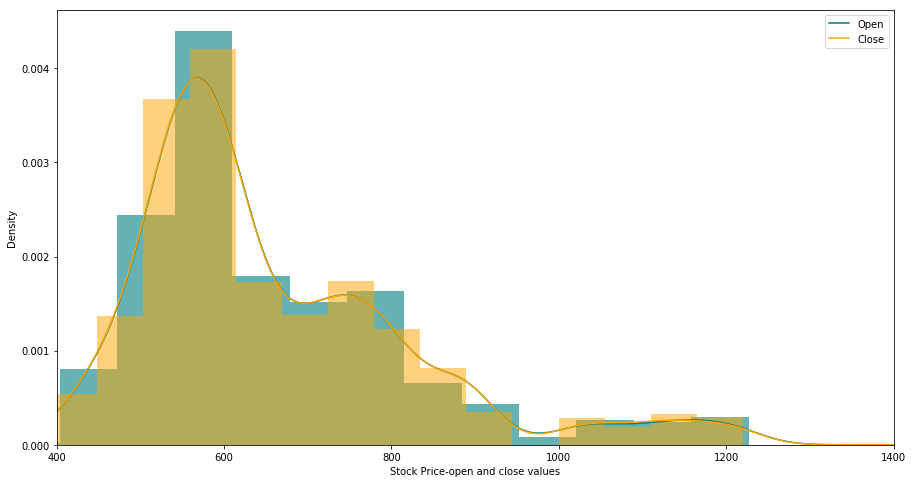

In [22]:
plt.figure(figsize=(15,8))
ax = dataset_train["Open"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
dataset_train["Open"].plot(kind='density', color='teal')

ax = dataset_train["Close"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
dataset_train["Close"].plot(kind='density', color='orange')

ax.legend(['Open', 'Close'])
ax.set(xlabel='Stock Price-open and close values')
plt.xlim(400,1400)
plt.show()